# Primer Examen 15%

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

In [2]:
df = pd.read_json('https://api.crossref.org/journals/1029-8479/works?rows=100')
df

,status,message-type,message-version,message
facets,ok,work-list,1.0.0,{}
items,ok,work-list,1.0.0,"[{'indexed': {'date-parts': [[2020, 3, 30]], '..."
items-per-page,ok,work-list,1.0.0,100
query,ok,work-list,1.0.0,"{'start-index': 0, 'search-terms': None}"
total-results,ok,work-list,1.0.0,31567


In [95]:
df.loc['items','message']

journal-issue': {'published-online': {'date-parts': [[2002, 5, 1]]},
   'issue': '05'},
  'URL': 'http://dx.doi.org/10.1088/1126-6708/2002/05/018',
  'relation': {'cites': []},
  'ISSN': ['1029-8479'],
  'issn-type': [{'value': '1029-8479', 'type': 'electronic'}]},
 {'indexed': {'date-parts': [[2020, 3, 31]],
   'date-time': '2020-03-31T05:43:10Z',
   'timestamp': 1585633390735},
  'reference-count': 32,
  'publisher': 'Springer Science and Business Media LLC',
  'issue': '05',
  'content-domain': {'domain': [], 'crossmark-restriction': False},
  'short-container-title': ['J. High Energy Phys.'],
  'DOI': '10.1088/1126-6708/2002/05/019',
  'type': 'journal-article',
  'created': {'date-parts': [[2002, 7, 26]],
   'date-time': '2002-07-26T21:56:55Z',
   'timestamp': 1027720615000},
  'page': '019-019',
  'source': 'Crossref',
  'is-referenced-by-count': 7,
  'title': ['Oblate, Toroidal, and Other Shapes for the Enhancon'],
  'prefix': '10.1007',
  'volume': '2002',
  'author': [{'given'

In [104]:
l = []
for d in df.loc['items','message']:
    if isinstance(d,dict):
        for j in d.get('author'):
            if j.get('given')=='Alessandro' and j.get('family')=='Strumia':
                l.append(d.get('DOI'))

l

          

['10.1088/1126-6708/2000/12/016', '10.1088/1126-6708/2001/11/048']

Comprobación:

In [105]:
for d in df.loc['items','message']:
    if d.get('DOI')==l[0] or d.get('DOI') ==l[1]:
        print(d.get('author'))
        print('-'*100)

[{'given': 'Riccardo', 'family': 'Barbieri', 'sequence': 'first', 'affiliation': []}, {'given': 'Alessandro', 'family': 'Strumia', 'sequence': 'additional', 'affiliation': []}]
----------------------------------------------------------------------------------------------------
[{'given': 'Alessandro', 'family': 'Strumia', 'sequence': 'first', 'affiliation': []}, {'given': 'Francesco', 'family': 'Vissani', 'sequence': 'additional', 'affiliation': []}]
----------------------------------------------------------------------------------------------------


## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

2a)

In [417]:
import random
raíces = [random.uniform(1,10) for i in range(0,7)]
p = np.poly1d(raíces,r = True)
print(p)

   7         6         5        4        3        2
1 x - 24.14 x + 244.9 x - 1352 x + 4378 x - 8297 x + 8497 x - 3616


In [450]:
pp = p.deriv()
ptoscríticos = [optimize.newton(func = pp,x0 = x,fprime = pp.deriv()) for x in np.arange(0,10,1)]
ptoscríticos.sort()
ptoscríticos

[1.793633336853331,
 1.7936333368533326,
 1.7936333368533581,
 3.1260769862855358,
 3.8019732605457186,
 4.900582620765601,
 4.900582620766157,
 4.900582620766835,
 4.90058262076711,
 4.900582620768083]

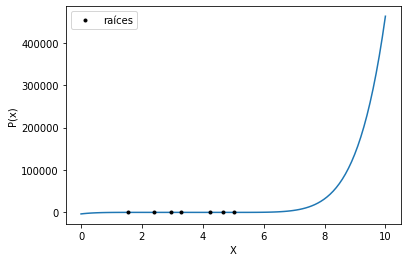

In [419]:
x = np.linspace(0,10,100)
plt.plot(x,p(x))
plt.plot(raíces,p(raíces),'.k', label = 'raíces')
# plt.plot(x,pp(x))
# plt.plot(ptoscríticos[0],p(ptoscríticos[0]),'.r',label = 'mínimo')
# plt.plot(ptoscríticos[-1],p(ptoscríticos[-1]),'.g',label = 'máximo')
plt.ylabel('P(x)')
plt.xlabel('X')
plt.legend()

plt.show()

In [471]:
print('Punto crítico de menor valor: {}'.format(ptoscríticos[0]))
print('Putno crítico de mayor valor: {}'.format(ptoscríticos[-1]))

min = optimize.fminbound(p,1,9,full_output=True)
max = optimize.fminbound(-p,1,9,full_output=True)
print('Mínimo global:{} con p(x) = {}'.format(min[0],min[1]))
print('Máximo global:{} con p(x) = {}'.format(max[0],max[1]))

    

Punto crítico de menor valor: 1.793633336853331
Putno crítico de mayor valor: 4.900582620768083
Mínimo global:3.8019743713018084 con p(x) = -0.6203930676174423
Máximo global:8.999996509401624 con p(x) = -138803.05868701488
